In [ ]:
import pandas as pd

data=pd.read_csv('Life Expectancy Data.csv')

In [ ]:
import seaborn as sns

In [ ]:
list_of_columns=list(pd.DataFrame(data.columns)[0].str.replace(' ','').str.upper())

In [ ]:
data.columns=list_of_columns

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data.drop('LIFEEXPECTANCY',axis=1), data['LIFEEXPECTANCY'], test_size=0.2, random_state=42)

In [ ]:
num_variables=['ADULTMORTALITY', 'INFANTDEATHS',
       'ALCOHOL', 'PERCENTAGEEXPENDITURE', 'HEPATITISB', 'MEASLES', 'BMI',
       'UNDER-FIVEDEATHS', 'POLIO', 'TOTALEXPENDITURE', 'DIPHTHERIA',
       'HIV/AIDS', 'GDP', 'POPULATION', 'THINNESS1-19YEARS',
       'THINNESS5-9YEARS', 'INCOMECOMPOSITIONOFRESOURCES', 'SCHOOLING']

In [ ]:
a=X_train[num_variables].isnull().sum()
missing_value_columns=list(a[a>0].index)

EXPLORING DATA

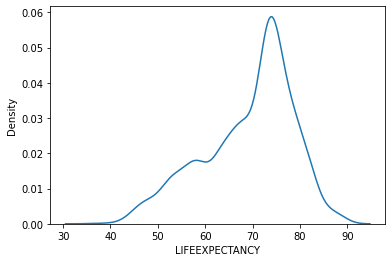

In [ ]:
sns.kdeplot(data=data,x='LIFEEXPECTANCY')

In [ ]:
data['LIFEEXPECTANCY'].mean()

69.22493169398912

In [ ]:
data['LIFEEXPECTANCY'].median()

72.1

In [ ]:
data['LIFEEXPECTANCY'].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: LIFEEXPECTANCY, dtype: float64

In [ ]:
data[(data['LIFEEXPECTANCY']>35) & (data['LIFEEXPECTANCY']<60)].describe(percentiles=[0.3,0.7])[['GDP','YEAR']]

GDP         YEAR
count    497.000000   589.000000
mean    1035.934907  2006.334465
std     2326.737281     4.446796
min        3.685949  2000.000000
30%      261.521533  2003.000000
50%      417.891430  2006.000000
70%      644.596562  2009.000000
max    22742.381590  2015.000000

In [ ]:
data.describe(percentiles=[0.3,0.7])[['GDP','YEAR']]

GDP         YEAR
count    2490.000000  2938.000000
mean     7483.158469  2007.518720
std     14270.169342     4.613841
min         1.681350  2000.000000
30%       596.501253  2004.000000
50%      1766.947595  2008.000000
70%      4691.110315  2011.000000
max    119172.741800  2015.000000

In [ ]:
data['MEASLES']

0       1154
1        492
2        430
3       2787
4       3013
        ... 
2933      31
2934     998
2935     304
2936     529
2937    1483
Name: MEASLES, Length: 2938, dtype: int64

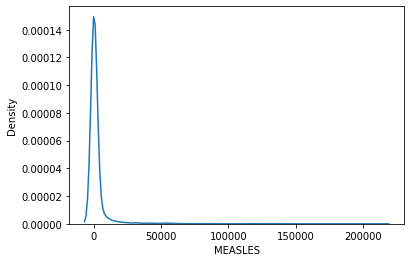

In [ ]:
sns.kdeplot(data['MEASLES'])

FINDING MISSING DATA

In [ ]:
X_train.isnull().sum()

COUNTRY                           0
YEAR                              0
STATUS                            0
ADULTMORTALITY                    8
INFANTDEATHS                      0
ALCOHOL                         158
PERCENTAGEEXPENDITURE             0
HEPATITISB                      439
MEASLES                           0
BMI                              27
UNDER-FIVEDEATHS                  0
POLIO                            14
TOTALEXPENDITURE                185
DIPHTHERIA                       14
HIV/AIDS                          0
GDP                             345
POPULATION                      516
THINNESS1-19YEARS                27
THINNESS5-9YEARS                 27
INCOMECOMPOSITIONOFRESOURCES    131
SCHOOLING                       129
dtype: int64

In [ ]:
X_test.isnull().sum()

COUNTRY                           0
YEAR                              0
STATUS                            0
ADULTMORTALITY                    2
INFANTDEATHS                      0
ALCOHOL                          36
PERCENTAGEEXPENDITURE             0
HEPATITISB                      114
MEASLES                           0
BMI                               7
UNDER-FIVEDEATHS                  0
POLIO                             5
TOTALEXPENDITURE                 41
DIPHTHERIA                        5
HIV/AIDS                          0
GDP                             103
POPULATION                      136
THINNESS1-19YEARS                 7
THINNESS5-9YEARS                  7
INCOMECOMPOSITIONOFRESOURCES     36
SCHOOLING                        34
dtype: int64

REMOVING USELESS DATA

REMOVING ROWS WITH MORE THAN 4 VALUES MISSING

In [ ]:
a=X_train.isnull().sum(axis=1)

In [ ]:
list_of_index=list(a[a>4].index)

In [ ]:
X_train.drop(list_of_index,axis=0,inplace=True)

In [ ]:
y_train.drop(list_of_index,axis=0,inplace=True)

ADDING MISSING FEATURE FOR HEPATITISB,POPULATION for both TRAIN/TEST

NOT ADDED GDP BECAUSE IT IS SHOWING EQUAL DISTRIBUTION OF THE MISSING DATA ALL OVER THE DATASET

In [ ]:
import numpy as np

In [ ]:
X_train['missing_hepatitisb']=X_train['HEPATITISB'].isnull().astype(int)

X_test['missing_hepatitisb']=X_test['HEPATITISB'].isnull().astype(int)

In [ ]:
X_train['missing_population']=X_train['POPULATION'].isnull().astype(int)

X_test['missing_population']=X_test['POPULATION'].isnull().astype(int)

FILLING THE MISSING VALUES IN TRAIN/TEST 

In [ ]:
X_train.isnull().sum()

COUNTRY                           0
YEAR                              0
STATUS                            0
ADULTMORTALITY                    5
INFANTDEATHS                      0
ALCOHOL                         137
PERCENTAGEEXPENDITURE             0
HEPATITISB                      389
MEASLES                           0
BMI                              12
UNDER-FIVEDEATHS                  0
POLIO                             6
TOTALEXPENDITURE                143
DIPHTHERIA                        6
HIV/AIDS                          0
GDP                             280
POPULATION                      456
THINNESS1-19YEARS                12
THINNESS5-9YEARS                 12
INCOMECOMPOSITIONOFRESOURCES     71
SCHOOLING                        69
missing_hepatitisb                0
missing_population                0
dtype: int64

In [ ]:
a=X_train.isnull().sum()

In [ ]:
column_with_missing_data=list(a[a>0].index)

In [ ]:
column_with_missing_data

['ADULTMORTALITY',
 'ALCOHOL',
 'HEPATITISB',
 'BMI',
 'POLIO',
 'TOTALEXPENDITURE',
 'DIPHTHERIA',
 'GDP',
 'POPULATION',
 'THINNESS1-19YEARS',
 'THINNESS5-9YEARS',
 'INCOMECOMPOSITIONOFRESOURCES',
 'SCHOOLING']

In [ ]:
import matplotlib.pyplot as plt

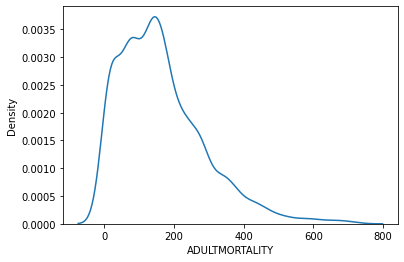

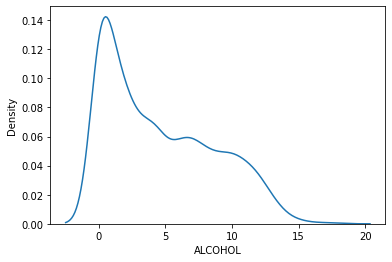

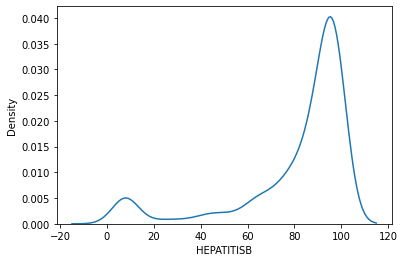

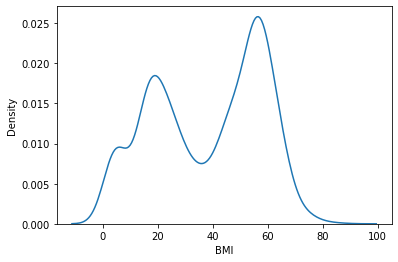

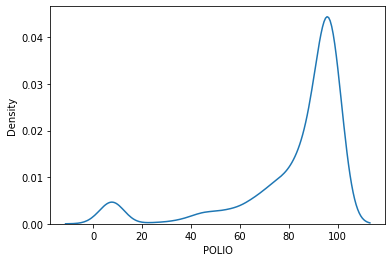

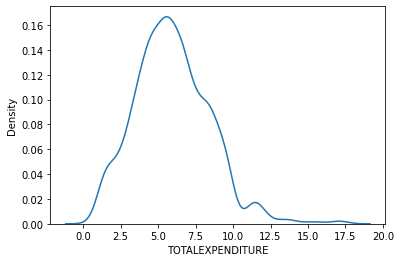

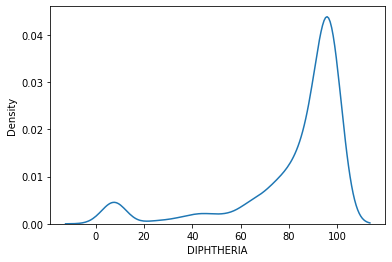

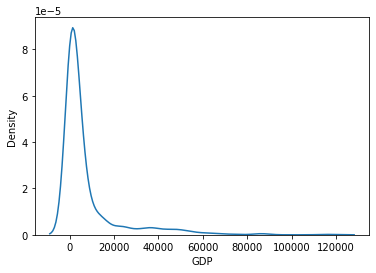

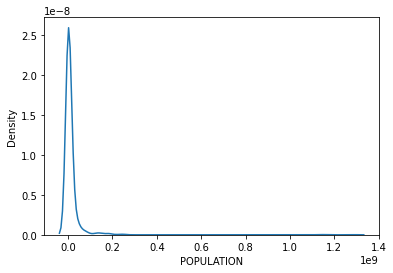

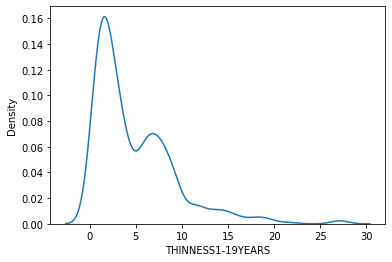

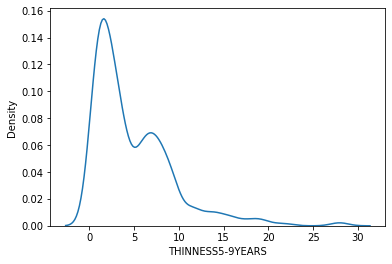

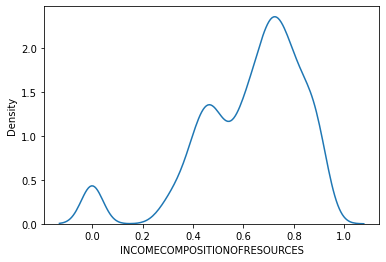

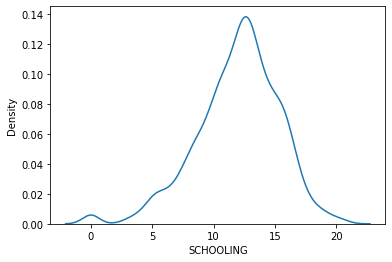

In [ ]:
for column in column_with_missing_data:
    sns.kdeplot(data[column])
    plt.show()

In [ ]:
for column in column_with_missing_data:
    index_with_missing_data=list(X_train[X_train[column].isnull()].index)
    for index in index_with_missing_data:
        country=X_train['COUNTRY'].loc[index]
        year=X_train['YEAR'].loc[index]
        print(country)
        print(column)
        print(year)
        print(index)
        value=X_train[X_train['COUNTRY']==country][column].notnull().sum()
        if value>=1:
            
            value_to_replace=X_train[X_train['COUNTRY']==country][column].mean()
            X_train[column].loc[index]=value_to_replace 
         
        
        else:
            if column in ['BMI','SCHOOLING']:
                value_to_replace=X_train[X_train['YEAR']==year][column].mean()
                X_train[column].loc[index]=value_to_replace
                
                
            else:
                value_to_replace=X_train[X_train['YEAR']==year][column].median()
                X_train[column].loc[index]=value_to_replace  
            
            

Marshall Islands
ADULTMORTALITY
2013
1650
Saint Kitts and Nevis
ADULTMORTALITY
2013
2167
Nauru
ADULTMORTALITY
2013
1812
Palau
ADULTMORTALITY
2013
1958
Dominica
ADULTMORTALITY
2013
769
Oman
ALCOHOL
2015
1926
Ghana
ALCOHOL
2015
1010
Lesotho
ALCOHOL
2015
1474
Nepal
ALCOHOL
2015
1813
Mali
ALCOHOL
2015
1618
Cameroon
ALCOHOL
2015
480
Tajikistan
ALCOHOL
2015
2553
Jamaica
ALCOHOL
2015
1298
Georgia
ALCOHOL
2015
978
Barbados
ALCOHOL
2015
208
Madagascar
ALCOHOL
2015
1554
Lao People's Democratic Republic
ALCOHOL
2015
1426
Kyrgyzstan
ALCOHOL
2015
1410
Angola
ALCOHOL
2015
48
Seychelles
ALCOHOL
2015
2281
Belgium
ALCOHOL
2015
240
Malaysia
ALCOHOL
2015
1586
Cuba
ALCOHOL
2015
657
Ecuador
ALCOHOL
2015
786
Maldives
ALCOHOL
2015
1602
Philippines
ALCOHOL
2015
2023
Burundi
ALCOHOL
2015
416
Tonga
ALCOHOL
2015
2633
Vanuatu
ALCOHOL
2015
2842
Zambia
ALCOHOL
2015
2906
Bangladesh
ALCOHOL
2015
192
Austria
ALCOHOL
2015
128
Bolivia (Plurinational State of)
ALCOHOL
2015
304
Saint Lucia
ALCOHOL
2015
2168
Estonia
ALCOHO

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Streaming output truncated to the last 5000 lines.
Switzerland
HEPATITISB
2013
2523
Ghana
HEPATITISB
2001
1024
Switzerland
HEPATITISB
2011
2525
Togo
HEPATITISB
2002
2630
Japan
HEPATITISB
2009
1320
Switzerland
HEPATITISB
2002
2534
Paraguay
HEPATITISB
2001
2005
Peru
HEPATITISB
2002
2020
Hungary
HEPATITISB
2012
1157
Peru
HEPATITISB
2000
2022
Uzbekistan
HEPATITISB
2000
2841
Netherlands
HEPATITISB
2010
1834
Japan
HEPATITISB
2014
1315
Argentina
HEPATITISB
2001
94
Equatorial Guinea
HEPATITISB
2006
843
Timor-Leste
HEPATITISB
2001
2615
Iceland
HEPATITISB
2003
1182
Eritrea
HEPATITISB
2001
864
Finland
HEPATITISB
2007
922
Cambodia
HEPATITISB
2002
477
Niger
HEPATITISB
2004
1888
Japan
HEPATITISB
2011
1318
Viet Nam
HEPATITISB
2000
2889
Japan
HEPATITISB
2015
1314
Japan
HEPATITISB
2010
1319
Nigeria
HEPATITISB
2000
1908
Bosnia and Herzegovina
HEPATITISB
2002
333
Norway
HEPATITISB
2008
1917
Nepal
HEPATITISB
2000
1828
Croatia
HEPATITISB
2003
653
Chile
HEPATITISB
2001
558
Sweden
HEPATITISB
2007
2513
Equato

In [ ]:
X_train[X_train['COUNTRY']=='Algeria']['HEPATITISB'].mean()

76.0

In [ ]:
X_train[X_train['YEAR']==2009]['POPULATION'].median()

1469029.5

In [ ]:
X_train.isnull().sum()

COUNTRY                         0
YEAR                            0
STATUS                          0
ADULTMORTALITY                  0
INFANTDEATHS                    0
ALCOHOL                         0
PERCENTAGEEXPENDITURE           0
HEPATITISB                      0
MEASLES                         0
BMI                             0
UNDER-FIVEDEATHS                0
POLIO                           0
TOTALEXPENDITURE                0
DIPHTHERIA                      0
HIV/AIDS                        0
GDP                             0
POPULATION                      0
THINNESS1-19YEARS               0
THINNESS5-9YEARS                0
INCOMECOMPOSITIONOFRESOURCES    0
SCHOOLING                       0
missing_hepatitisb              0
missing_population              0
dtype: int64

FILLING MISSING VALUES FOR THE TEST SET

In [ ]:
X_test.isnull().sum()

COUNTRY                           0
YEAR                              0
STATUS                            0
ADULTMORTALITY                    2
INFANTDEATHS                      0
ALCOHOL                          36
PERCENTAGEEXPENDITURE             0
HEPATITISB                      114
MEASLES                           0
BMI                               7
UNDER-FIVEDEATHS                  0
POLIO                             5
TOTALEXPENDITURE                 41
DIPHTHERIA                        5
HIV/AIDS                          0
GDP                             103
POPULATION                      136
THINNESS1-19YEARS                 7
THINNESS5-9YEARS                  7
INCOMECOMPOSITIONOFRESOURCES     36
SCHOOLING                        34
missing_hepatitisb                0
missing_population                0
dtype: int64

In [ ]:

for column in column_with_missing_data:
    index_with_missing_data=list(X_test[X_test[column].isnull()].index)
    for index in index_with_missing_data:
        country=X_test['COUNTRY'].loc[index]
        year=X_test['YEAR'].loc[index]
        print(country)
        print(column)
        print(year)
        print(index)
        value=X_train[X_train['COUNTRY']==country][column].notnull().sum()
        if value>=1:
            
            value_to_replace=X_train[X_train['COUNTRY']==country][column].mean()
            print(f'1-------------------{value_to_replace}')
            
            X_test[column].loc[index]=value_to_replace 
         
        
        else:
            if column in ['BMI','SCHOOLING']:
                value_to_replace=X_train[X_train['YEAR']==year][column].mean()
                X_test[column].loc[index]=value_to_replace 
               
                
                
            else:
                value_to_replace=X_train[X_train['YEAR']==year][column].median()
                print(f'3-------------------{value_to_replace}')
                X_test[column].loc[index]=value_to_replace  
            

San Marino
ADULTMORTALITY
2013
2216
3-------------------136.5
Tuvalu
ADULTMORTALITY
2013
2713
3-------------------136.5
Côte d'Ivoire
ALCOHOL
2015
432
1-------------------3.019999999999999
Belize
ALCOHOL
2015
256
1-------------------6.304166666666666
Sierra Leone
ALCOHOL
2015
2297
1-------------------3.105714285714286
Mozambique
ALCOHOL
2015
1764
1-------------------1.291
Montenegro
ALCOHOL
2015
1732
1-------------------2.834545454545454
Slovakia
ALCOHOL
2015
2329
1-------------------10.471666666666668
Chad
ALCOHOL
2015
528
1-------------------0.40090909090909094
Kenya
ALCOHOL
2015
1362
1-------------------1.5355555555555558
Turkmenistan
ALCOHOL
2015
2697
1-------------------2.654166666666667
Algeria
ALCOHOL
2015
32
1-------------------0.41250000000000003
Zimbabwe
ALCOHOL
2015
2922
1-------------------4.7299999999999995
Democratic People's Republic of Korea
ALCOHOL
2015
705
3-------------------3.9797916666666664
Iraq
ALCOHOL
2015
1234
1-------------------0.14
South Sudan
ALCOHOL
2002
2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


HEPATITISB
2004
1840
1-------------------49.0
Norway
HEPATITISB
2013
1912
1-------------------88.0
Togo
HEPATITISB
2000
2632
1-------------------74.16666666666667
Central African Republic
HEPATITISB
2006
521
1-------------------42.666666666666664
Somalia
HEPATITISB
2002
2390
1-------------------42.0
Saint Lucia
HEPATITISB
2000
2183
1-------------------88.84615384615384
Timor-Leste
HEPATITISB
2005
2611
1-------------------78.60000000000001
Togo
HEPATITISB
2001
2631
1-------------------74.16666666666667
Guinea
HEPATITISB
2001
1088
1-------------------59.5
Burundi
HEPATITISB
2001
430
1-------------------93.1111111111111
Chile
HEPATITISB
2004
555
1-------------------75.0
Cambodia
HEPATITISB
2001
478
1-------------------77.0
Suriname
HEPATITISB
2004
2484
1-------------------85.44444444444444
Cabo Verde
HEPATITISB
2000
463
1-------------------79.45454545454545
Ireland
HEPATITISB
2005
1260
1-------------------85.20000000000002
Serbia
HEPATITISB
2001
2279
1-------------------90.4
Myanmar
HEPAT

In [ ]:
X_test.isnull().sum()

COUNTRY                         0
YEAR                            0
STATUS                          0
ADULTMORTALITY                  0
INFANTDEATHS                    0
ALCOHOL                         0
PERCENTAGEEXPENDITURE           0
HEPATITISB                      0
MEASLES                         0
BMI                             0
UNDER-FIVEDEATHS                0
POLIO                           0
TOTALEXPENDITURE                0
DIPHTHERIA                      0
HIV/AIDS                        0
GDP                             0
POPULATION                      0
THINNESS1-19YEARS               0
THINNESS5-9YEARS                0
INCOMECOMPOSITIONOFRESOURCES    0
SCHOOLING                       0
missing_hepatitisb              0
missing_population              0
dtype: int64

In [ ]:
X_train.columns

Index(['COUNTRY', 'YEAR', 'STATUS', 'ADULTMORTALITY', 'INFANTDEATHS',
       'ALCOHOL', 'PERCENTAGEEXPENDITURE', 'HEPATITISB', 'MEASLES', 'BMI',
       'UNDER-FIVEDEATHS', 'POLIO', 'TOTALEXPENDITURE', 'DIPHTHERIA',
       'HIV/AIDS', 'GDP', 'POPULATION', 'THINNESS1-19YEARS',
       'THINNESS5-9YEARS', 'INCOMECOMPOSITIONOFRESOURCES', 'SCHOOLING',
       'missing_hepatitisb', 'missing_population'],
      dtype='object')

ENCODING YEAR, STATUS IN TRAIN/TRAIN

STATUS ENCODING

In [ ]:
X_train['STATUS'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
X_train['STATUS_developing']=X_train['STATUS'].apply(lambda x : 1 if x=='Developing' else 0)

X_train['STATUS_developed']=X_train['STATUS'].apply(lambda x : 1 if x=='Developed' else 0)

In [ ]:
X_test['STATUS_developing']=X_test['STATUS'].apply(lambda x : 1 if x=='Developing' else 0)

X_test['STATUS_developed']=X_test['STATUS'].apply(lambda x : 1 if x=='Developed' else 0)

In [ ]:
X_train.drop('STATUS',axis=1,inplace=True)
X_test.drop('STATUS',axis=1,inplace=True)

YEAR ENCODING

In [ ]:
X_train['YEAR'].unique()

array([2007, 2001, 2011, 2013, 2002, 2003, 2004, 2015, 2012, 2005, 2014,
       2000, 2008, 2009, 2006, 2010])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
X_train['YEAR']=encoder.fit_transform(X_train['YEAR'])

In [ ]:
X_test['YEAR']=encoder.transform(X_test['YEAR'])

CLASSIFYING COUNTRIES INTO CONTINENT

In [ ]:
!pip install pycountry_convert

     |████████████████████████████████| 10.1 MB 7.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 296 kB 56.1 MB/s 
     |████████████████████████████████| 207 kB 58.8 MB/s 
     |████████████████████████████████| 296 kB 56.2 MB/s 
     |████████████████████████████████| 280 kB 60.1 MB/s 
     |████████████████████████████████| 280 kB 77.3 MB/s 
     |████████████████████████████████| 280 kB 54.5 MB/s 
     |████████████████████████████████| 280 kB 15.9 MB/s 
     |████████████████████████████████| 279 kB 49.7 MB/s 
     |████████████████████████████████| 279 kB 68.7 MB/s 
     |████████████████████████████████| 272 kB 75.2 MB/s 
     |████████████████████████████████| 272 kB 46.1 MB/s 
     |████████████████████████████████| 272 kB 77.3 MB/s 
     |████████████████████████████████| 270 kB 75.8 MB/s 
     |████████████████████████████████| 270 kB 74.2 MB/s 
    

In [ ]:
import pycountry_convert as pc

In [ ]:
country_code=pc.country_name_to_country_alpha2('Poland',cn_name_format='default')

print(country_code)

pc.country_alpha2_to_continent_code(country_code)

PL


'EU'

In [ ]:
list_of_countries_train=list(X_train['COUNTRY'].unique())

list_of_countries_test=list(X_test['COUNTRY'].unique())

In [ ]:
len(list_of_countries_train)

185

In [ ]:
len(list_of_countries_test)

180

In [ ]:
final_list_countries=list(set(list_of_countries_test)| set(list_of_countries_train))

In [ ]:
i=0
my_dict={}
for country in final_list_countries:
    if '(' in country:
        country=country.split('(')[0].replace(' ','')
        
    elif country=='Republic of Korea':
        country='South Korea'
        
    elif country=='The former Yugoslav republic of Macedonia':
        country='North Macedonia'
        
    try:    
        
        print(country)
        country_code=pc.country_name_to_country_alpha2(country,cn_name_format='default')
        continent_code=pc.country_alpha2_to_continent_code(country_code)
        my_dict[country]=continent_code
        
        
    except KeyError:
        continent_code='AS'
        my_dict[country]=continent_code
        
        
        
print(i)
    
    
      

        

Mali
Bolivia
Italy
Nauru
Bulgaria
Estonia
Sierra Leone
Seychelles
Malaysia
South Korea
Solomon Islands
Uganda
Guatemala
Mexico
Lebanon
Germany
Senegal
Brunei Darussalam
Samoa
Cabo Verde
Guinea
Zimbabwe
Micronesia
Cameroon
Canada
Finland
Eritrea
Greece
Nigeria
Russian Federation
Guinea-Bissau
United Arab Emirates
France
Ukraine
Luxembourg
Nepal
Qatar
El Salvador
Marshall Islands
Cyprus
Bangladesh
Switzerland
Thailand
Libya
Brazil
Croatia
Zambia
Spain
Morocco
Iraq
Portugal
Mauritius
Palau
Antigua and Barbuda
Swaziland
Ethiopia
North Macedonia
Venezuela
United States of America
Malta
Austria
Colombia
Romania
Gabon
Kyrgyzstan
Peru
Singapore
South Sudan
Egypt
Timor-Leste
Belarus
Iran
Dominican Republic
Chad
Angola
Chile
Equatorial Guinea
Trinidad and Tobago
Honduras
Democratic People's Republic of Korea
Afghanistan
Georgia
Lao People's Democratic Republic
Côte d'Ivoire
Togo
Kiribati
Democratic Republic of the Congo
Slovakia
Nicaragua
Czechia
Israel
Saint Lucia
South Africa
Sudan
Republic of

In [ ]:
my_dict

{'Afghanistan': 'AS',
 'Albania': 'EU',
 'Algeria': 'AF',
 'Angola': 'AF',
 'Antigua and Barbuda': 'NA',
 'Argentina': 'SA',
 'Armenia': 'AS',
 'Australia': 'OC',
 'Austria': 'EU',
 'Azerbaijan': 'AS',
 'Bahamas': 'NA',
 'Bahrain': 'AS',
 'Bangladesh': 'AS',
 'Barbados': 'NA',
 'Belarus': 'EU',
 'Belgium': 'EU',
 'Belize': 'NA',
 'Benin': 'AF',
 'Bhutan': 'AS',
 'Bolivia': 'SA',
 'Bosnia and Herzegovina': 'EU',
 'Botswana': 'AF',
 'Brazil': 'SA',
 'Brunei Darussalam': 'AS',
 'Bulgaria': 'EU',
 'Burkina Faso': 'AF',
 'Burundi': 'AF',
 'Cabo Verde': 'AF',
 'Cambodia': 'AS',
 'Cameroon': 'AF',
 'Canada': 'NA',
 'Central African Republic': 'AF',
 'Chad': 'AF',
 'Chile': 'SA',
 'China': 'AS',
 'Colombia': 'SA',
 'Comoros': 'AF',
 'Congo': 'AF',
 'Costa Rica': 'NA',
 'Croatia': 'EU',
 'Cuba': 'NA',
 'Cyprus': 'AS',
 'Czechia': 'EU',
 "Côte d'Ivoire": 'AF',
 "Democratic People's Republic of Korea": 'AS',
 'Democratic Republic of the Congo': 'AF',
 'Denmark': 'EU',
 'Djibouti': 'AF',
 'Dominic

In [ ]:
def country_into_continent_convertor(country):
    
    
    if '(' in country:
        
        country=country.split('(')[0].replace(' ','')
        
    elif country=='Republic of Korea':
        country='South Korea'
        
    elif country=='The former Yugoslav republic of Macedonia':
        country='North Macedonia'
        

    continent=my_dict[country]
    return continent
        
        
    
    
    

In [ ]:
X_train['COUNTRY']=X_train['COUNTRY'].apply(country_into_continent_convertor)

In [ ]:
X_test['COUNTRY']=X_test['COUNTRY'].apply(country_into_continent_convertor)

In [ ]:
X_train['COUNTRY'].value_counts()

AF    655
AS    577
EU    480
NA    276
SA    155
OC    133
Name: COUNTRY, dtype: int64

ONE HOT ENCODING COUNTRY TRAIN/TEST

In [ ]:
country_train_random_forest=X_train['COUNTRY']
country_test_random_forest=X_test['COUNTRY']

In [ ]:
!pip install feature_engine

     |████████████████████████████████| 205 kB 8.7 MB/s 
     |████████████████████████████████| 9.8 MB 50.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from feature_engine.encoding import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(drop_last=True)

In [ ]:
a=encoder.fit_transform(pd.DataFrame(X_train['COUNTRY']))

X_train[a.columns]=a

In [ ]:
b=encoder.transform(pd.DataFrame(X_test['COUNTRY']))

X_test[b.columns]=b

In [ ]:
X_train.drop('COUNTRY',axis=1,inplace=True)
X_test.drop('COUNTRY',axis=1,inplace=True)

REMOVING OUTLIERS FROM THE NUM VARIABLES

In [ ]:
len(num_variables)

18

In [ ]:
fig,ax=plt.subplots(ncols=6,nrows=3,figsize=(25,25),dpi=400)
b=0
a=0
ax.s
for column in num_variables:

    sns.boxplot(data=X_train,y=column,ax=ax[a][b])
    
    b=b+1
    if b==6:
        b=0
        a=a+1
 

plt.tight_layout()

In [ ]:
X_train_gut=X_train.copy()
X_test_gut=X_test.copy()

In [ ]:
def finding_cap(var):
    a=pd.DataFrame(data.loc[X_train.index]['LIFEEXPECTANCY'])

    b=pd.DataFrame(X_train[var])

    cor_value=pd.concat((a,b),axis=1).corr()['LIFEEXPECTANCY'].iloc[1]
    print(cor_value)
    print('\n')
    
    
    for x in range(2,4):
        
        
        
        diff=X_train[var].quantile(0.75)-X_train[var].quantile(0.25)

        upper_limit=X_train[var].quantile(0.75)+x*diff

        lower_limit=X_train[var].quantile(0.25)-x*diff
         
        print(upper_limit)
        def fun(num):
            if num>upper_limit:
                return upper_limit
            elif num<lower_limit:
                return lower_limit
            else:
                return num
    
        
        a=pd.DataFrame(X_train[var].apply(fun))
        a['final']=data.loc[a.index]['LIFEEXPECTANCY']
        
        cor=a.corr()[var].iloc[1]
        print(cor)
        
        print('\n')
        
        
    x=int(input('ENTER MULTIPLE VALUE:'))
    if x in [2,3]:
        diff=X_train[var].quantile(0.75)-X_train[var].quantile(0.25)

        upper_limit=X_train[var].quantile(0.75)+x*diff

        lower_limit=X_train[var].quantile(0.25)-x*diff
        a=pd.DataFrame(X_train[var].apply(fun))
        X_train[var]=a
        print('SUCCESS')
        
    else:
        pass
        

In [ ]:
for column in num_variables:
    finding_cap(column)

-0.6998130472531388


527.0
-0.6986363758113917


678.0
-0.699981818343987


ENTER MULTIPLE VALUE:4
-0.19391066938931117


57.0
-0.5415121629682583


76.0
-0.5176630461097441


ENTER MULTIPLE VALUE:3
SUCCESS
0.3862105512141903


20.990357142857142
0.3862105512141904


27.685535714285713
0.3862105512141904


ENTER MULTIPLE VALUE:4
0.37992805301424987


1385.387160172
0.4867930001831429


1844.3800713705
0.48180128622674184


ENTER MULTIPLE VALUE:3
SUCCESS
0.2912926313447742


140.0
0.3255920808727848


162.0
0.29114827673322324


ENTER MULTIPLE VALUE:2
SUCCESS
-0.1544291361205213


1002.0
-0.32591064930225694


1336.0
-0.3171014093749534


ENTER MULTIPLE VALUE:2
SUCCESS
0.5565121022018218


129.1
0.5565121022018218


165.6
0.5565121022018218


ENTER MULTIPLE VALUE:3
SUCCESS
-0.2190461366440712


72.0
-0.5804342601876996


96.0
-0.5616392647831067


ENTER MULTIPLE VALUE:2
SUCCESS
0.4337516255125921


133.5
0.5237071830877831


151.75
0.47356136838774504


ENTER MULTIPLE VALUE:2
SUCCESS
0

In [ ]:
X_train.describe()

YEAR  ADULTMORTALITY  INFANTDEATHS      ALCOHOL  \
count  2276.000000     2276.000000   2276.000000  2276.000000   
mean      7.542179      164.422012     28.253515     4.596205   
std       4.592825      124.720984    112.916203     4.006627   
min       0.000000        1.000000      0.000000     0.010000   
25%       4.000000       74.000000      0.000000     0.904821   
50%       8.000000      143.000000      3.000000     3.808214   
75%      12.000000      225.000000     19.000000     7.600000   
max      15.000000      723.000000   1800.000000    17.310000   

       PERCENTAGEEXPENDITURE   HEPATITISB        MEASLES          BMI  \
count            2276.000000  2276.000000    2276.000000  2276.000000   
mean              743.889860    79.671097    2177.093585    38.647793   
std              1979.741613    24.613078   10954.228337    19.952860   
min                 0.000000     1.000000       0.000000     1.400000   
25%                 8.408427    74.000000       0.000000    19.600000   
50%                72.614105    89.000000      15.000000    44.050000   
75%               467.401338    96.000000     334.000000    56.100000   
max             19099.045060    99.000000  212183.000000    87.300000   

       UNDER-FIVEDEATHS        POLIO  ...    SCHOOLING  missing_hepatitisb  \
count       2276.000000  2276.000000  ...  2276.000000         2276.000000   
mean          39.241652    82.962751  ...    12.104368            0.170914   
std          154.312113    22.984180  ...     3.210646            0.376516   
min            0.000000     3.000000  ...     0.000000            0.000000   
25%            0.000000    78.750000  ...    10.300000            0.000000   
50%            3.000000    93.000000  ...    12.500000            0.000000   
75%           24.000000    97.000000  ...    14.200000            0.000000   
max         2500.000000    99.000000  ...    20.700000            1.000000   

       missing_population  STATUS_developing  STATUS_developed   COUNTRY_AF  \
count         2276.000000        2276.000000       2276.000000  2276.000000   
mean             0.200351           0.826011          0.173989     0.287786   
std              0.400351           0.379184          0.379184     0.452830   
min              0.000000           0.000000          0.000000     0.000000   
25%              0.000000           1.000000          0.000000     0.000000   
50%              0.000000           1.000000          0.000000     0.000000   
75%              0.000000           1.000000          0.000000     1.000000   
max              1.000000           1.000000          1.000000     1.000000   

        COUNTRY_NA   COUNTRY_AS   COUNTRY_OC   COUNTRY_SA  
count  2276.000000  2276.000000  2276.000000  2276.000000  
mean      0.121265     0.253515     0.058436     0.068102  
std       0.326507     0.435119     0.234617     0.251976  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000  
75%       0.000000     1.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000  

[8 rows x 28 columns]

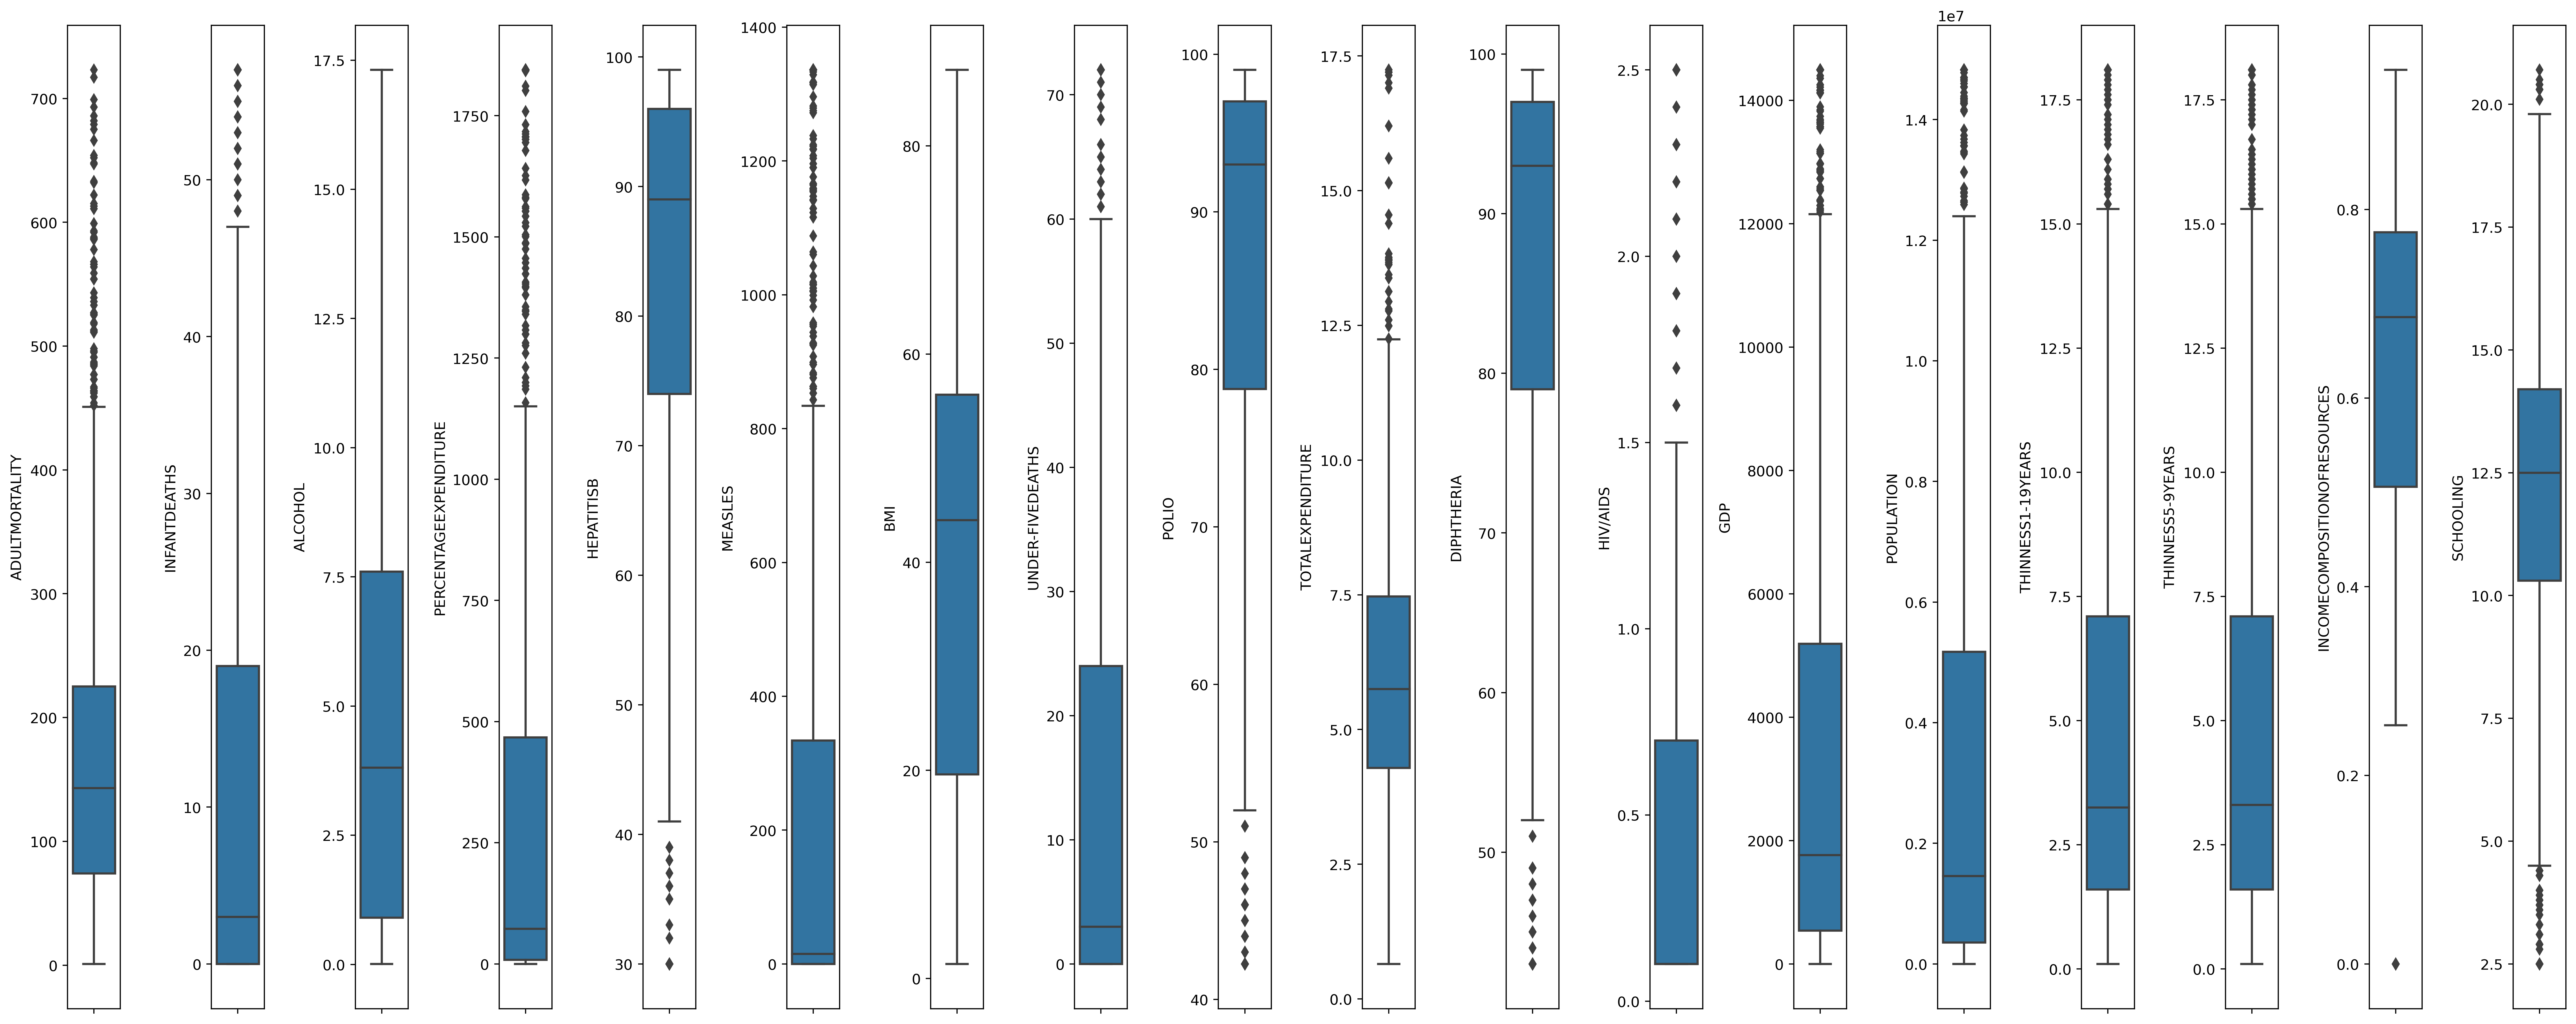

In [ ]:
fig,ax=plt.subplots(ncols=18,nrows=1,figsize=(25,10),dpi=400)
b=0
a=0

for column in num_variables:

    sns.boxplot(data=X_train,y=column,ax=ax[b])
    b=b+1
    
    
 

plt.tight_layout()

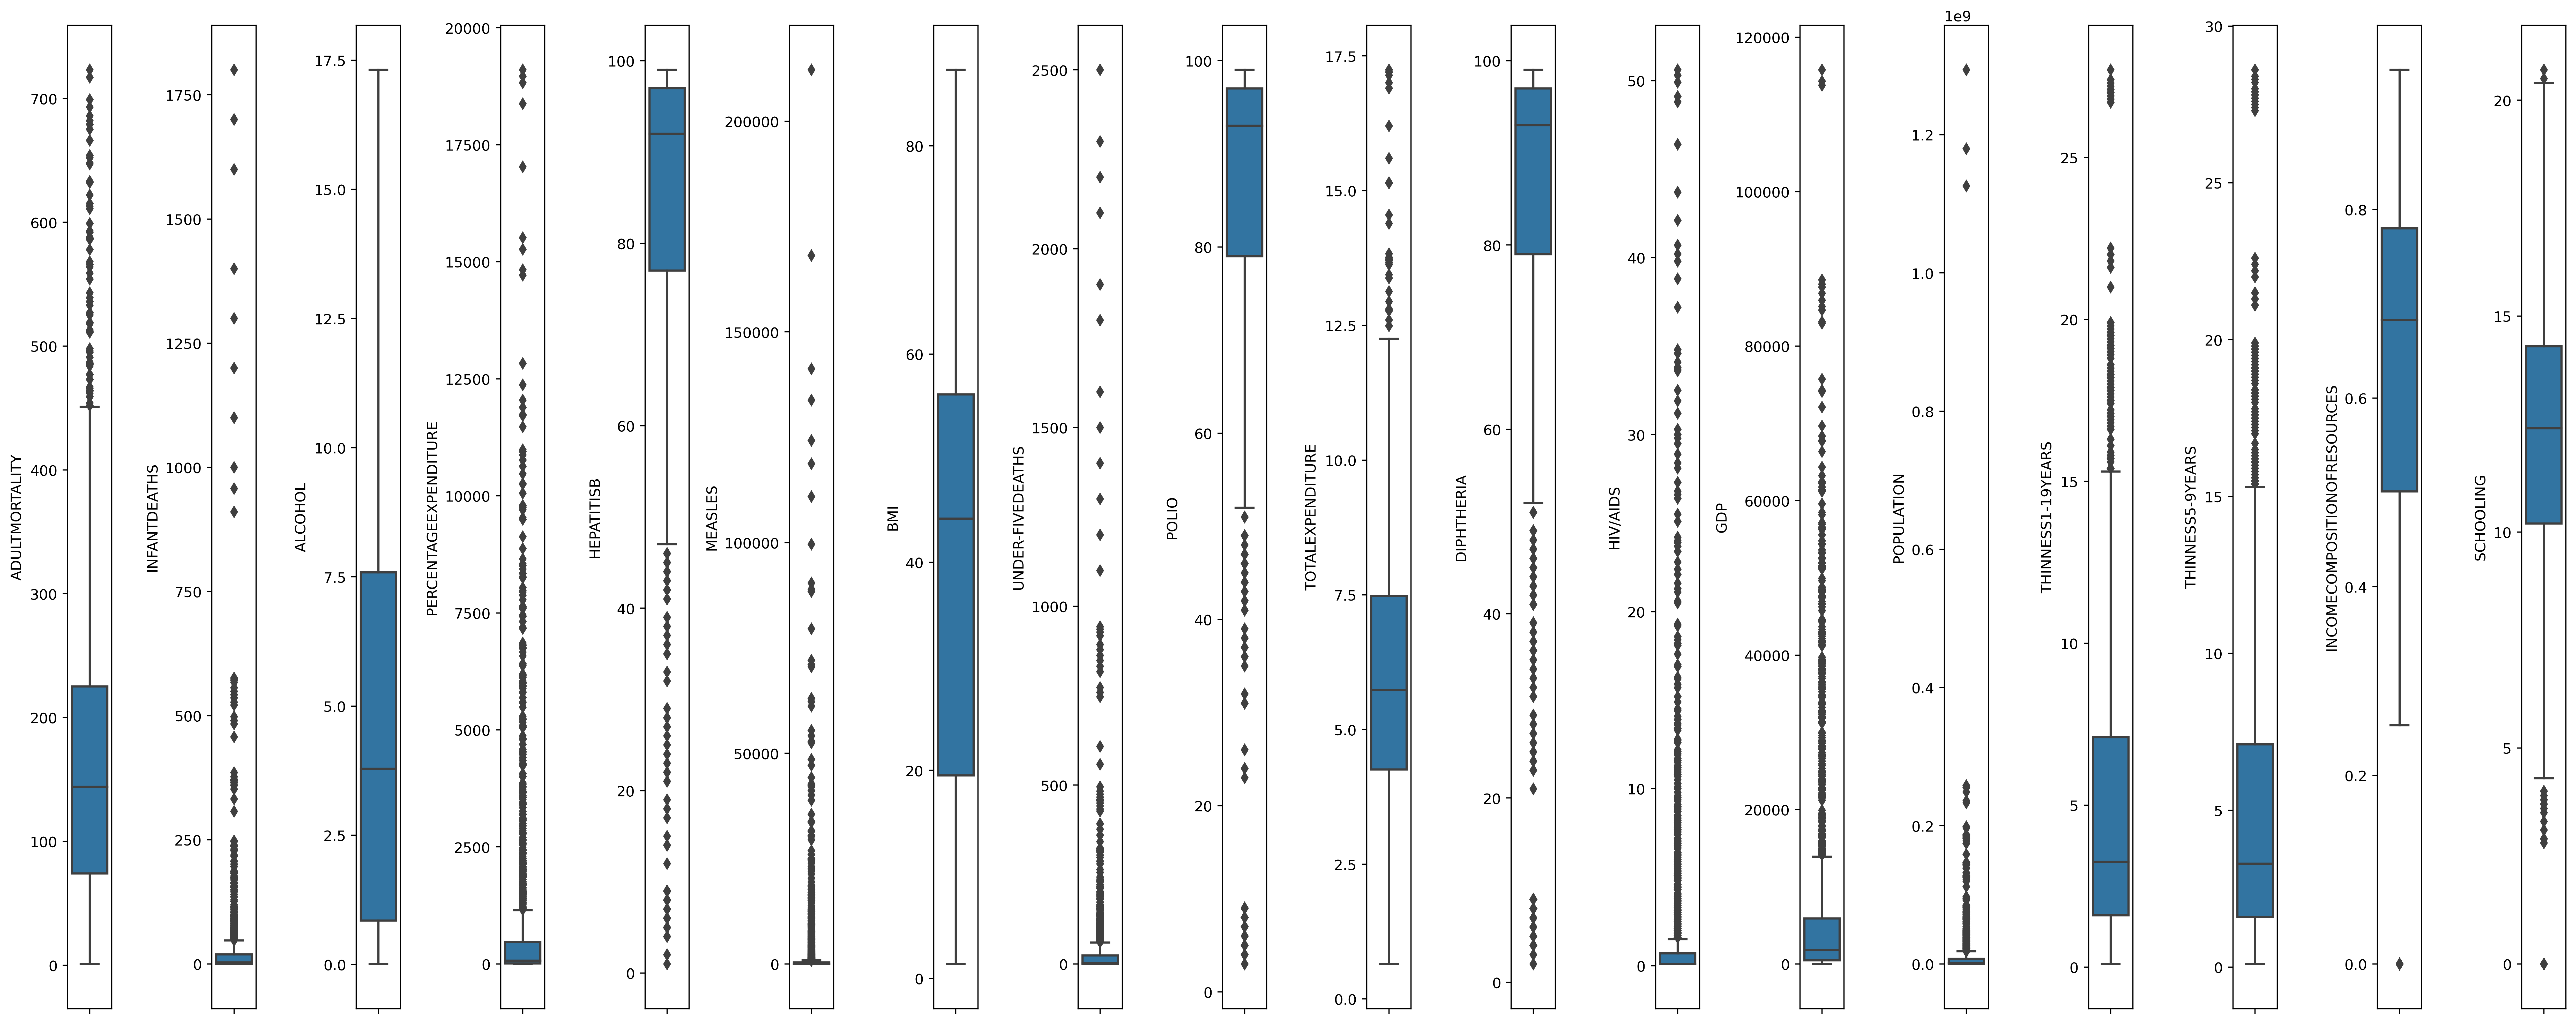

In [ ]:
fig,ax=plt.subplots(ncols=18,nrows=1,figsize=(25,10),dpi=400)
b=0
a=0

for column in num_variables:

    sns.boxplot(data=data.loc[X_train.index],y=column,ax=ax[b])
    b=b+1
    
    
 

plt.tight_layout()

TRANSFORMING SKEWED  VARIABLES

LOG TRANSFORMATION

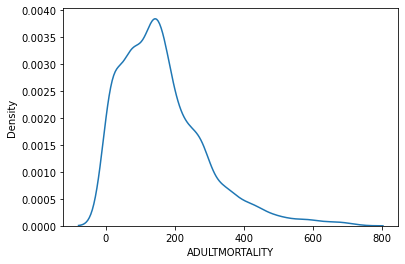

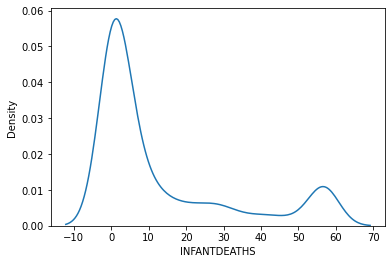

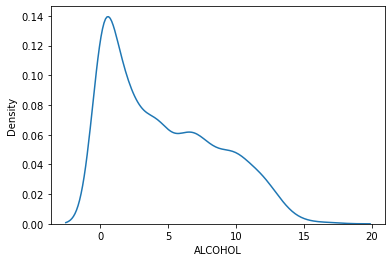

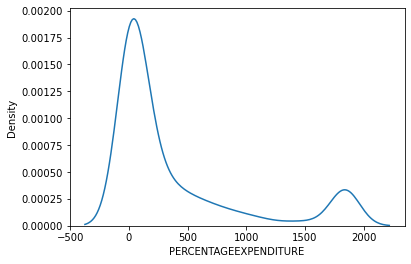

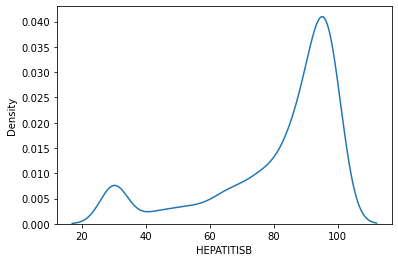

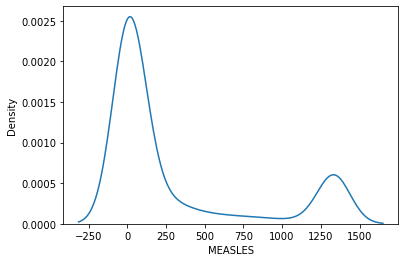

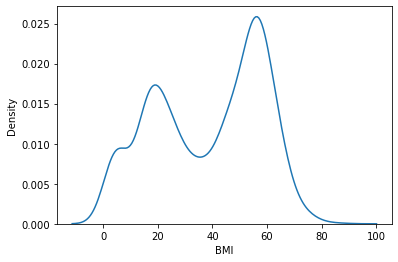

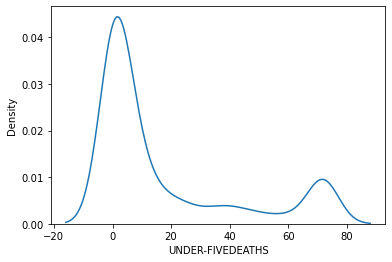

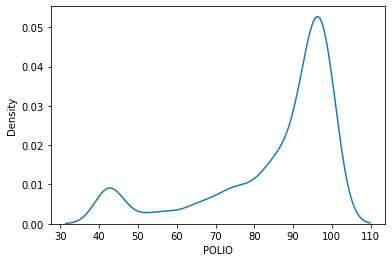

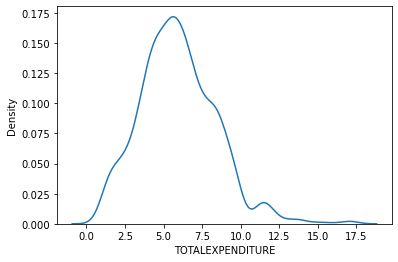

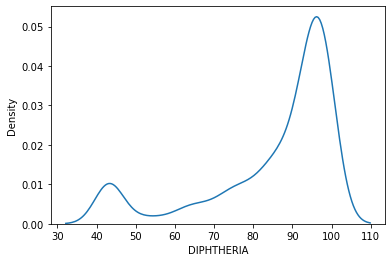

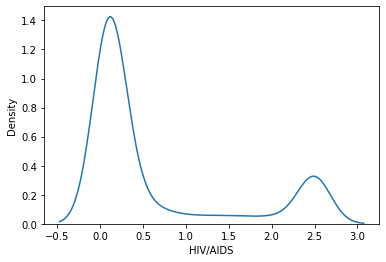

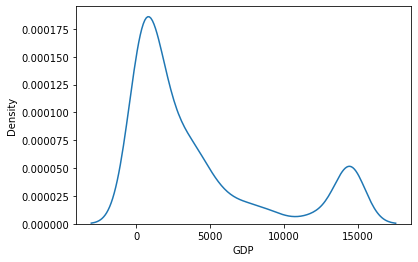

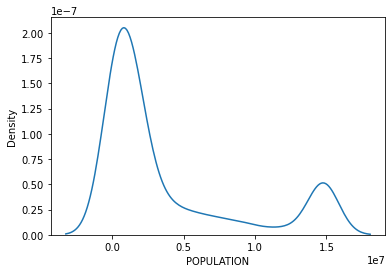

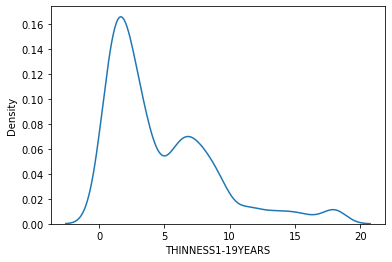

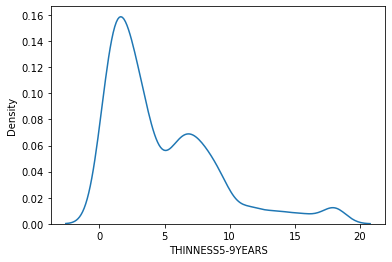

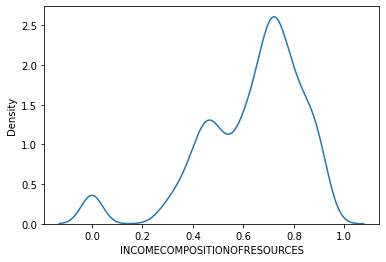

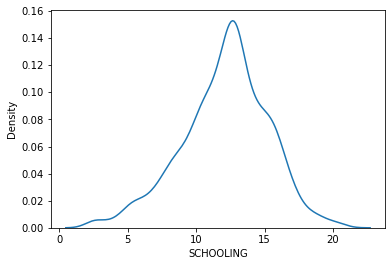

In [ ]:
for column in num_variables:
    sns.kdeplot(X_train[column])
    plt.show()

In [ ]:
skewed_variables=['ADULTMORTALITY','INFANTDEATHS','ALCOHOL','PERCENTAGEEXPENDITURE','HEPATITISB','MEASLES','UNDER-FIVEDEATHS','POLIO','DIPHTHERIA','HIV/AIDS','GDP','POPULATION','THINNESS1-19YEARS','THINNESS5-9YEARS']

In [ ]:
len(skewed_variables)

14

LOG TRANSFORMATION

In [ ]:
a=X_train['THINNESS5-9YEARS']

b=data.loc[X_train.index]['LIFEEXPECTANCY']

pd.concat((a,b),axis=1).corr()

THINNESS5-9YEARS  LIFEEXPECTANCY
THINNESS5-9YEARS          1.000000       -0.486647
LIFEEXPECTANCY           -0.486647        1.000000

In [ ]:
a=np.log(X_train['THINNESS5-9YEARS'])

b=data.loc[X_train.index]['LIFEEXPECTANCY']

pd.concat((a,b),axis=1).corr()

THINNESS5-9YEARS  LIFEEXPECTANCY
THINNESS5-9YEARS          1.000000       -0.520648
LIFEEXPECTANCY           -0.520648        1.000000

In [ ]:
X_train['HIV/AIDS']=np.log(X_train['HIV/AIDS'])
X_test['HIV/AIDS']=np.log(X_test['THINNESS5-9YEARS'])

POWER TRANSFORMATION

In [ ]:
skewed_variables

['ADULTMORTALITY',
 'INFANTDEATHS',
 'ALCOHOL',
 'PERCENTAGEEXPENDITURE',
 'HEPATITISB',
 'MEASLES',
 'UNDER-FIVEDEATHS',
 'POLIO',
 'DIPHTHERIA',
 'HIV/AIDS',
 'GDP',
 'POPULATION',
 'THINNESS1-19YEARS',
 'THINNESS5-9YEARS']

In [ ]:
from sklearn.preprocessing import PowerTransformer

trans=PowerTransformer(method='yeo-johnson')

In [ ]:
a=X_train['POPULATION']

b=data.loc[X_train.index]['LIFEEXPECTANCY']

pd.concat((a,b),axis=1).corr()

POPULATION  LIFEEXPECTANCY
POPULATION        1.000000       -0.093067
LIFEEXPECTANCY   -0.093067        1.000000

In [ ]:
a=pd.DataFrame(trans.fit_transform(pd.DataFrame(X_train['POPULATION'])))

b=data.loc[X_train.index]['LIFEEXPECTANCY']

pd.concat((a,b),axis=1).corr()

0  LIFEEXPECTANCY
0               1.000000       -0.032733
LIFEEXPECTANCY -0.032733        1.000000

EXPONENTIAL TRANSFORMATION

In [ ]:
skewed_variables

['ADULTMORTALITY',
 'INFANTDEATHS',
 'ALCOHOL',
 'PERCENTAGEEXPENDITURE',
 'HEPATITISB',
 'MEASLES',
 'UNDER-FIVEDEATHS',
 'POLIO',
 'DIPHTHERIA',
 'HIV/AIDS',
 'GDP',
 'POPULATION',
 'THINNESS1-19YEARS',
 'THINNESS5-9YEARS']

In [ ]:
import feature_engine.transformation as vt
et = vt.PowerTransformer()

In [ ]:
a=X_train['DIPHTHERIA']
b=data.loc[X_train.index]['LIFEEXPECTANCY']
pd.concat((a,b),axis=1).corr()

DIPHTHERIA  LIFEEXPECTANCY
DIPHTHERIA        1.000000        0.532283
LIFEEXPECTANCY    0.532283        1.000000

In [ ]:
a=pd.DataFrame(et.fit_transform(pd.DataFrame(X_train['DIPHTHERIA'])))
b=data.loc[X_train.index]['LIFEEXPECTANCY']
pd.concat((a,b),axis=1).corr()

DIPHTHERIA  LIFEEXPECTANCY
DIPHTHERIA        1.000000        0.519207
LIFEEXPECTANCY    0.519207        1.000000

In [ ]:
X_train['MEASLES']=pd.DataFrame(et.fit_transform(pd.DataFrame(X_train['MEASLES'])))
X_test['MEASLES']=pd.DataFrame(et.transform(pd.DataFrame(X_test['MEASLES'])))

DISCRETISATION

In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [ ]:
disc_variables=['ADULTMORTALITY','ALCOHOL','PERCENTAGEEXPENDITURE','HEPATITISB','POLIO','DIPHTHERIA']

In [ ]:
a=X_train['DIPHTHERIA']

b=data.loc[X_train.index]['LIFEEXPECTANCY']

pd.concat((a,b),axis=1).corr()

DIPHTHERIA  LIFEEXPECTANCY
DIPHTHERIA        1.000000        0.532283
LIFEEXPECTANCY    0.532283        1.000000

In [ ]:
disc = EqualFrequencyDiscretiser(q=9, variables = ['DIPHTHERIA'])

a=disc.fit_transform(pd.DataFrame(X_train['DIPHTHERIA']))

b=data.loc[X_train.index]['LIFEEXPECTANCY']

pd.concat((a,b),axis=1).corr()

DIPHTHERIA  LIFEEXPECTANCY
DIPHTHERIA        1.000000        0.542545
LIFEEXPECTANCY    0.542545        1.000000

In [ ]:
X_train['DIPHTHERIA']=disc.fit_transform(pd.DataFrame(X_train['DIPHTHERIA']))
X_test['DIPHTHERIA']=disc.transform(pd.DataFrame(X_test['DIPHTHERIA']))

STANDARD SCALING REMAING FEATURES

In [ ]:
a=X_train['PERCENTAGEEXPENDITURE']

b=data.loc[X_train.index]['LIFEEXPECTANCY']

pd.concat((a,b),axis=1).corr()

PERCENTAGEEXPENDITURE  LIFEEXPECTANCY
PERCENTAGEEXPENDITURE               1.000000        0.481801
LIFEEXPECTANCY                      0.481801        1.000000

In [ ]:
a=pd.DataFrame(scaler.fit_transform(pd.DataFrame(X_train['PERCENTAGEEXPENDITURE'])))

b=data.loc[X_train.index]['LIFEEXPECTANCY']

pd.concat((a,b),axis=1).corr()

0  LIFEEXPECTANCY
0               1.000000        0.039841
LIFEEXPECTANCY  0.039841        1.000000

array([[-0.30813143],
       [-0.0996203 ],
       [-0.17179723],
       ...,
       [ 0.81462082],
       [-0.74119302],
       [-1.04594006]])

REMOVING CORR FEATURES

In [ ]:
X_train.columns

Index(['YEAR', 'ADULTMORTALITY', 'INFANTDEATHS', 'ALCOHOL',
       'PERCENTAGEEXPENDITURE', 'HEPATITISB', 'MEASLES', 'BMI',
       'UNDER-FIVEDEATHS', 'POLIO', 'TOTALEXPENDITURE', 'DIPHTHERIA',
       'HIV/AIDS', 'GDP', 'POPULATION', 'THINNESS1-19YEARS',
       'THINNESS5-9YEARS', 'INCOMECOMPOSITIONOFRESOURCES', 'SCHOOLING',
       'missing_hepatitisb', 'missing_population', 'STATUS_developing',
       'STATUS_developed', 'COUNTRY_AF', 'COUNTRY_NA', 'COUNTRY_AS',
       'COUNTRY_OC', 'COUNTRY_SA', 'LIFEEXPECTANCY'],
      dtype='object')

In [ ]:
X_train['LIFEEXPECTANCY']=data.loc[X_train.index]['LIFEEXPECTANCY']

In [ ]:
X_train.corr()

YEAR  ADULTMORTALITY  INFANTDEATHS  \
YEAR                          1.000000       -0.079318     -0.046269   
ADULTMORTALITY               -0.079318        1.000000      0.387585   
INFANTDEATHS                 -0.046269        0.387585      1.000000   
ALCOHOL                      -0.046477       -0.179775     -0.380570   
PERCENTAGEEXPENDITURE         0.022578       -0.315850     -0.374846   
HEPATITISB                    0.194754       -0.245494     -0.344220   
MEASLES                      -0.102089        0.196637      0.605785   
BMI                           0.103515       -0.383889     -0.465598   
UNDER-FIVEDEATHS             -0.047628        0.408808      0.995641   
POLIO                         0.106093       -0.337425     -0.441357   
TOTALEXPENDITURE              0.076329       -0.098543     -0.150861   
DIPHTHERIA                    0.129368       -0.337300     -0.424978   
HIV/AIDS                     -0.071925        0.605233      0.449455   
GDP                           0.161057       -0.333979     -0.438995   
POPULATION                    0.030832        0.103859      0.343953   
THINNESS1-19YEARS            -0.032201        0.349924      0.434991   
THINNESS5-9YEARS             -0.032302        0.365419      0.455844   
INCOMECOMPOSITIONOFRESOURCES  0.241104       -0.434768     -0.429200   
SCHOOLING                     0.216392       -0.435512     -0.550914   
missing_hepatitisb           -0.343130        0.050751      0.010576   
missing_population            0.013809       -0.091257     -0.116820   
STATUS_developing             0.008002        0.307215      0.353224   
STATUS_developed             -0.008002       -0.307215     -0.353224   
COUNTRY_AF                   -0.002352        0.520598      0.434879   
COUNTRY_NA                   -0.001947       -0.109198     -0.144025   
COUNTRY_AS                   -0.001724       -0.144633      0.131989   
COUNTRY_OC                    0.021983       -0.058684     -0.203934   
COUNTRY_SA                   -0.006091       -0.060918      0.002479   
LIFEEXPECTANCY                0.169608       -0.699813     -0.591550   

                               ALCOHOL  PERCENTAGEEXPENDITURE  HEPATITISB  \
YEAR                         -0.046477               0.022578    0.194754   
ADULTMORTALITY               -0.179775              -0.315850   -0.245494   
INFANTDEATHS                 -0.380570              -0.374846   -0.344220   
ALCOHOL                       1.000000               0.372281    0.141103   
PERCENTAGEEXPENDITURE         0.372281               1.000000    0.117066   
HEPATITISB                    0.141103               0.117066    1.000000   
MEASLES                      -0.198867              -0.157901   -0.267125   
BMI                           0.320676               0.316976    0.221012   
UNDER-FIVEDEATHS             -0.380712              -0.378774   -0.352460   
POLIO                         0.276522               0.247160    0.742432   
TOTALEXPENDITURE              0.285816               0.159799    0.040429   
DIPHTHERIA                    0.286915               0.246533    0.758862   
HIV/AIDS                     -0.220302              -0.317818   -0.374565   
GDP                           0.402228               0.666043    0.257145   
POPULATION                    0.002225              -0.030016   -0.096045   
THINNESS1-19YEARS            -0.415974              -0.364019   -0.042412   
THINNESS5-9YEARS             -0.412202              -0.376791   -0.053971   
INCOMECOMPOSITIONOFRESOURCES  0.455304               0.472397    0.315372   
SCHOOLING                     0.547544               0.498649    0.350333   
missing_hepatitisb            0.100749               0.096597   -0.246969   
missing_population           -0.059288              -0.049066    0.230070   
STATUS_developing            -0.591246              -0.453389   -0.132292   
STATUS_developed              0.591246               0.453389    0.132292   
COUNTRY_AF               

In [ ]:
my_list=[]
for column in X_train.columns:
    for row in X_train.columns:
        value=X_train.corr()[column].loc[row]
        if ((value>0.8) |(value<-0.8)) & (row!=column):
            my_list.append((column,row,value))

In [ ]:
my_list

[('INFANTDEATHS', 'UNDER-FIVEDEATHS', 0.9904644540332571),
 ('UNDER-FIVEDEATHS', 'INFANTDEATHS', 0.9904644540332571),
 ('POLIO', 'DIPHTHERIA', 0.9176315482169582),
 ('DIPHTHERIA', 'POLIO', 0.9176315482169582),
 ('THINNESS1-19YEARS', 'THINNESS5-9YEARS', 0.9598132722029219),
 ('THINNESS5-9YEARS', 'THINNESS1-19YEARS', 0.9598132722029219),
 ('STATUS_developing', 'STATUS_developed', -1.0),
 ('STATUS_developed', 'STATUS_developing', -1.0)]

In [ ]:
X_train.drop('STATUS_developed',axis=1,inplace=True)
X_test.drop('STATUS_developed',axis=1,inplace=True)

In [ ]:
X_train.drop('INFANTDEATHS',axis=1,inplace=True)
X_test.drop('INFANTDEATHS',axis=1,inplace=True)

In [ ]:
a=X_train['POLIO']+X_train['DIPHTHERIA']

b=X_train['LIFEEXPECTANCY']

pd.concat((a,b),axis=1).corr()

0  LIFEEXPECTANCY
0               1.000000        0.551117
LIFEEXPECTANCY  0.551117        1.000000

In [ ]:
X_train.drop('THINNESS1-19YEARS',axis=1,inplace=True)
X_test.drop('THINNESS1-19YEARS',axis=1,inplace=True)

In [ ]:
X_train['POLIO_DIPHTHERIA_ADD']=X_train['POLIO']+X_train['DIPHTHERIA']

X_test['POLIO_DIPHTHERIA_ADD']=X_test['POLIO']+X_test['DIPHTHERIA']

In [ ]:
X_train.drop(['POLIO','DIPHTHERIA'],axis=1,inplace=True)
X_test.drop(['POLIO','DIPHTHERIA'],axis=1,inplace=True)

In [ ]:
X_train.columns

Index(['YEAR', 'ADULTMORTALITY', 'ALCOHOL', 'PERCENTAGEEXPENDITURE',
       'HEPATITISB', 'MEASLES', 'BMI', 'UNDER-FIVEDEATHS', 'TOTALEXPENDITURE',
       'HIV/AIDS', 'GDP', 'POPULATION', 'THINNESS5-9YEARS',
       'INCOMECOMPOSITIONOFRESOURCES', 'SCHOOLING', 'missing_hepatitisb',
       'missing_population', 'STATUS_developing', 'COUNTRY_AF', 'COUNTRY_NA',
       'COUNTRY_AS', 'COUNTRY_OC', 'COUNTRY_SA', 'POLIO_DIPHTHERIA_ADD'],
      dtype='object')

REMOVING MISSING VALUES FROM Y-TRAIN

In [ ]:
missing_data_train=list(y_train[y_train.isnull()].index)

missing_data_test=list(y_test[y_test.isnull()].index)

In [ ]:
X_train.drop(missing_data_train,axis=0,inplace=True)

X_test.drop(missing_data_test,axis=0,inplace=True)

In [ ]:
y_train.drop(missing_data_train,axis=0,inplace=True)
y_test.drop(missing_data_test,axis=0,inplace=True)

TESTING VARIOUS MODELS

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
def train(model):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    cv_score=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=4)
    print(cv_score)
    cv_score=np.abs(np.mean(cv_score))
    print('TRAIN MSE',mean_squared_error(y_train,model.predict(X_train)))
    print('MSE TEST:',mean_squared_error(y_test,pred))
    print('CROSS VAL:',cv_score)
    

In [ ]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

LINEAR MODEL

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

[-12.20651832 -12.48973444 -12.19147289 -12.95466765]
TRAIN MSE 12.086572566120585
MSE TEST: 16.56538859092485
CROSS VAL: 12.460598323856495


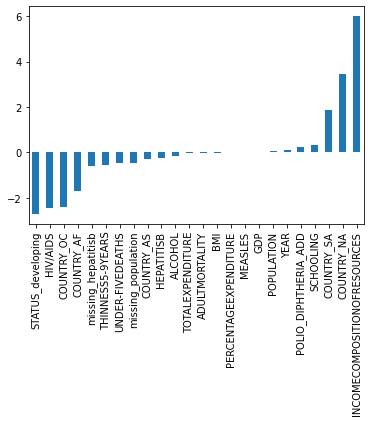

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression(normalize=True)
train(model)
coef=pd.Series(model.coef_,X_train.columns).sort_values()
coef.plot(kind='bar')

[-10.4529011   -5.49517621  -7.46991189  -8.63859031  -9.48017621]
TRAIN MSE 0.0
MSE TEST: 6.172150170648466
CROSS VAL: 8.307351144890353


<AxesSubplot:>

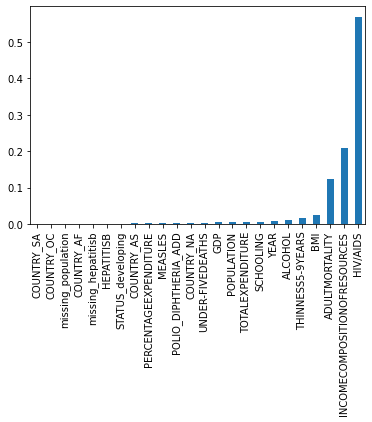

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train.columns).sort_values()
coef.plot(kind='bar')

RANDOM FOREST

[-4.31277981 -3.31265762 -4.07337989 -4.39702807]
TRAIN MSE 0.48180503346543385
MSE TEST: 2.649037778156993
CROSS VAL: 4.023961349504434


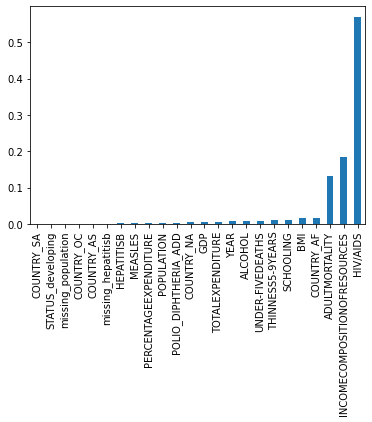

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train.columns).sort_values()
coef.plot(kind='bar')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf = RandomForestRegressor(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 600, cv = 4, verbose = True, n_jobs = -1,scoring='neg_mean_squared_error')
best_clf_rf_rnd = clf_rf_rnd.fit(X_train,y_train)
clf_performance(best_clf_rf_rnd,'Extra Tree REGRESSOR')

Fitting 4 folds for each of 600 candidates, totalling 2400 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

456     72.3
462     73.0
2172    74.6
2667    74.9
381     74.8
        ... 
1638    87.0
1095    56.7
1130    61.8
1294    79.9
860     59.4
Name: LIFEEXPECTANCY, Length: 2276, dtype: float64

EXTRA TREE

[-3.65302612 -2.68858395 -3.17558598 -3.75585905]
TRAIN MSE 6.164685160543233e-09
MSE TEST: 2.1318165597269587
CROSS VAL: 3.3182637755491324


<AxesSubplot:>

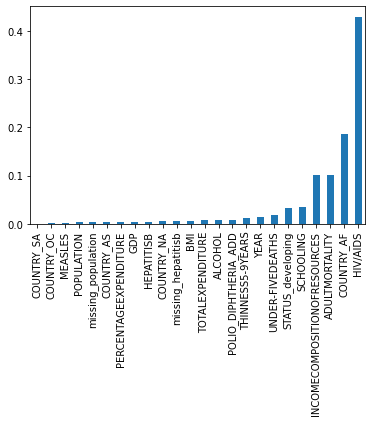

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model=ExtraTreesRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train.columns).sort_values()
coef.plot(kind='bar')

XGBOOST

In [ ]:
import xgboost

[16:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[-5.12570591 -4.86550909 -5.55453042 -5.73676373]
TRAIN MSE 3.593843899543998
MSE TEST: 4.482470454788575
CROSS VAL: 5.320627288602014


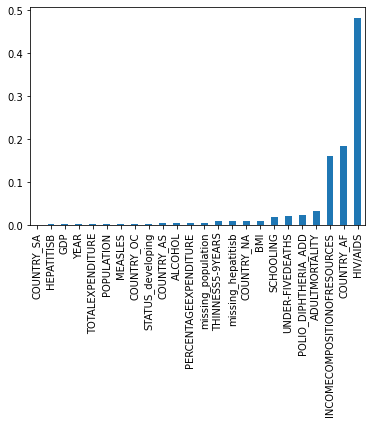

In [ ]:
model=xgboost.XGBRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train.columns).sort_values()
coef.plot(kind='bar')

In [ ]:
xgb = xgboost.XGBRegressor(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}


clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 700, cv = 4, verbose = 2, n_jobs = -1,scoring='neg_mean_squared_error')
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')

Fitting 4 folds for each of 700 candidates, totalling 2800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 2800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", l

[17:07:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB
Best Score: -3.4709824088061207
Best Parameters: {'subsample': 0.9, 'sampling_method': 'gradient_based', 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 0, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb = xgboost.XGBRegressor(random_state = 1)
param_grid = {
    'n_estimators': [100,125,150],
    'colsample_bytree': [0.65,0.7,0.75],
    'max_depth': [12,15,17],
    'reg_alpha': [1],
    'reg_lambda': [1.25,1],
    'subsample': [0.85,0.9,0.95],
    'learning_rate':[0.1,0.3],
    'gamma':[0.1,0.5],
    'min_child_weight':[0],
    'sampling_method': ['gradient_based']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 4, verbose = True, n_jobs = -1,)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
[18:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB
Best Score: 0.9612255051338482
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 0, 'n_estimators': 150, 'reg_alpha': 1, 'reg_lambda': 1, 'sampling_method': 'gradient_based', 'subsample': 0.9}


In [ ]:
train( best_clf_xgb.best_estimator_)

[18:04:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[-3.27297379 -3.1084205  -3.74348421 -3.63684605]
TRAIN MSE 0.07984939550667257
MSE TEST: 2.559719995799385
CROSS VAL: 3.4404311386476905
